# 1) How well do different data roles pay?
# 2) Top 10 highest-paid skills for Data Analysts & top 10 most in-demand skills for Data Analysts.

## Steps  
1. **Evaluate median salary for top 6 data jobs**  
2. **Find median salary per skill for Data Analysts**  
3. **Visualize for highest paying skills and most demanded skills**  


### Importing libraries & basic cleaning 

In [2]:
import pandas as pd
import ast

from datasets import load_dataset
import matplotlib.pyplot as plt 
import seaborn as sns

dataset = load_dataset("lukebarousse/data_jobs")
df = dataset["train"].to_pandas()

df["job_posted_date"] = pd.to_datetime(df["job_posted_date"])
df["job_skills"] = df["job_skills"].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x) # job skills coloumn is converted to list

In [20]:
df_ind = df[(df["job_country"] == "India")].dropna(subset="salary_year_avg") # dropping nan values
df_ind.sample(3)

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
148331,Senior Data Engineer,"Senior Data Engineer, Enabling Functions Data ...",India,via Ai-Jobs.net,Full-time,False,India,2023-12-28 08:32:58,True,False,India,year,153500.0,NaN,Bristol Myers Squibb,[excel],{'analyst_tools': ['excel']}
304647,Data Engineer,Data Engineering Manager,"Mumbai, Maharashtra, India",via Ai-Jobs.net,Full-time,False,India,2023-03-23 17:21:27,False,False,India,year,147500.0,NaN,Verisk,"[python, spark, airflow]","{'libraries': ['spark', 'airflow'], 'programmi..."
689188,Data Scientist,Technology Consultant - Cloud Data Fusion,"Chennai, Tamil Nadu, India",via Ai-Jobs.net,Full-time,False,India,2023-01-06 10:27:00,False,False,India,year,79200.0,NaN,Kinaxis,"[java, sql, r, python, gcp, azure, aws, oracle...","{'analyst_tools': ['sap'], 'cloud': ['gcp', 'a..."


In [27]:
job_titles = df_ind["job_title_short"].value_counts().head(6).index.to_list()
job_titles

['Data Engineer',
 'Data Analyst',
 'Data Scientist',
 'Machine Learning Engineer',
 'Senior Data Engineer',
 'Software Engineer']

In [29]:
df_ind_top6 = df_ind[df_ind["job_title_short"].isin(job_titles)]
df_ind_top6.sample(3)

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
241893,Data Engineer,Delivery Solutions Architect : Big Data,India,via Ai-Jobs.net,Full-time,False,India,2023-06-08 07:29:36,True,False,India,year,79200.0,NaN,Databricks,"[sql, databricks, spark, hadoop, kafka, pandas...","{'analyst_tools': ['excel'], 'cloud': ['databr..."
267646,Machine Learning Engineer,Machine Learning Engineer,"Bengaluru, Karnataka, India",via Ai-Jobs.net,Full-time,False,India,2023-01-20 07:36:28,False,False,India,year,104668.0,NaN,Quizizz,"[python, sql, cassandra, bigquery, aws, kafka,...","{'cloud': ['bigquery', 'aws'], 'databases': ['..."
628485,Machine Learning Engineer,Staff Machine Learning Engineer,"Hyderabad, Telangana, India",via Ai-Jobs.net,Full-time,False,India,2023-01-09 12:11:58,False,False,India,year,79200.0,NaN,ServiceNow,"[java, python]","{'programming': ['java', 'python']}"


In [45]:
job_order = df_ind_top6.groupby(["job_title_short"])["salary_year_avg"].median().sort_values(ascending=False).index # so that the graph is in descending order
job_order

Index(['Data Engineer', 'Senior Data Engineer', 'Data Scientist',
       'Data Analyst', 'Machine Learning Engineer', 'Software Engineer'],
      dtype='object', name='job_title_short')

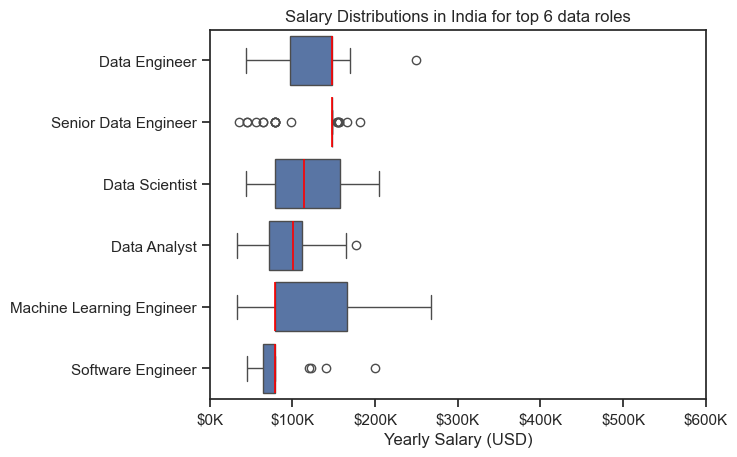

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style='ticks')
sns.boxplot(data=df_ind_top6, x='salary_year_avg', y='job_title_short', medianprops={"color": "red", "linewidth": 1.2}, order=job_order)

plt.title('Salary Distributions in India for top 6 data roles')
plt.xlabel('Yearly Salary (USD)')
plt.ylabel('')
plt.xlim(0, 600000)

ticks_x = plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K')
plt.gca().xaxis.set_major_formatter(ticks_x)

plt.show()
